### FORECASTING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


## 1.Data analysis and Engineering

### 1.1 Data Exploration



In [3]:
train.head()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


In [4]:
train.columns

Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')

In [5]:

train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)


### 1.2 Handle missing values

In [6]:
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)


### 1.3 Data Engineering





In [7]:
X_train = train.drop(['pm2.5', 'No'], axis=1)
y_train = train['pm2.5']

In [8]:
X_train = np.expand_dims(X_train, axis=1)

## 2. Build model

In [9]:
model = Sequential([
    LSTM(32, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]  # RMSE metric
)

model.summary()



/Users/testsolutions/Documents/school/year3/term2/time-series-forecasting/tsf-repo/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,409 (21.13 KB)

 Trainable params: 5,409 (21.13 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32
)

Epoch 1/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - lambda: 114.1789 - loss: 13855.3203
Epoch 2/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - lambda: 85.0683 - loss: 7693.2998
Epoch 3/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - lambda: 77.3817 - loss: 6374.9165
Epoch 4/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - lambda: 74.1788 - loss: 5830.4175
Epoch 5/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - lambda: 72.5566 - loss: 5604.9990
Epoch 6/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - lambda: 72.2170 - loss: 5508.7876
Epoch 7/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - lambda: 71.8185 - loss: 5463.8149
Epoch 8/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - lambda: 71.6149 - loss: 5435.1133
Epoch 9/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - lambda: 71.4807 - loss: 5414.6943
Epoch 10/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - lambda: 71.2995 - loss: 5395.3389


959/959 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step


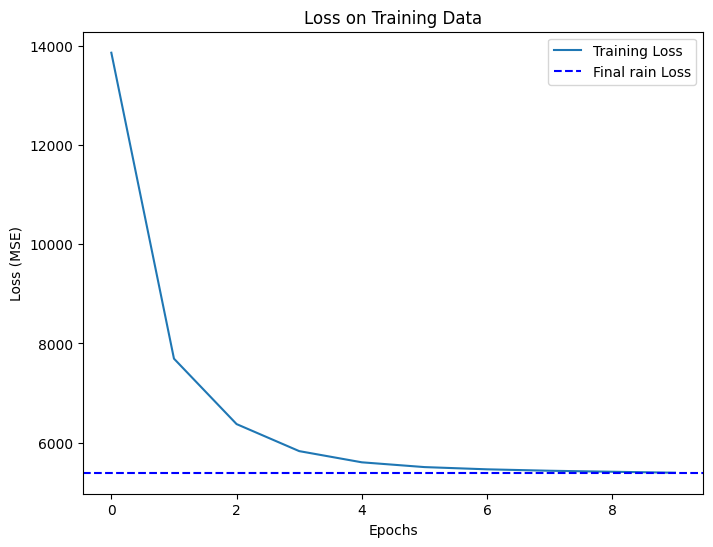

Final Training Loss (MSE): 5386.402834101599


In [11]:
train_predictions = model.predict(X_train)
train_loss = np.mean((y_train - train_predictions.flatten())**2)

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')  # Training loss during epochs
plt.axhline(y=train_loss, color='blue', linestyle='--', label='Final rain Loss')  # Final training loss
plt.title('Loss on Training Data')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

print(f"Final Training Loss (MSE): {train_loss}")

In [12]:
X_test = test.drop(['No'], axis=1)
X_test = np.expand_dims(X_test, axis=1)

predictions = model.predict(X_test)

predictions = np.nan_to_num(predictions)

predictions = np.round(predictions).astype(int)

submission = pd.DataFrame({
    'row ID': pd.to_datetime(test.index).strftime('%Y-%m-%d %-H:%M:%S'), 
    'pm2.5': predictions.flatten()
})

submission = submission.sort_values(by='row ID')

submission.to_csv('submissions/subm_fixed.csv', index=False)

411/411 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step
